<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-preparing-dataset" data-toc-modified-id="Loading-and-preparing-dataset-1">Loading and preparing dataset</a></span></li><li><span><a href="#Explore-main-variables" data-toc-modified-id="Explore-main-variables-2">Explore main variables</a></span><ul class="toc-item"><li><span><a href="#transcription-notes-----can-we-remove-this-subsection?-@giova" data-toc-modified-id="transcription-notes-----can-we-remove-this-subsection?-@giova-2.1">transcription notes  -- can we remove this subsection? @giova</a></span></li><li><span><a href="#age-distribution" data-toc-modified-id="age-distribution-2.2">age distribution</a></span></li><li><span><a href="#sickness-duration-distribution" data-toc-modified-id="sickness-duration-distribution-2.3">sickness duration distribution</a></span></li><li><span><a href="#gender-distribution" data-toc-modified-id="gender-distribution-2.4">gender distribution</a></span></li></ul></li><li><span><a href="#Classification-of-death-causes" data-toc-modified-id="Classification-of-death-causes-3">Classification of death causes</a></span><ul class="toc-item"><li><span><a href="#application-of-classification" data-toc-modified-id="application-of-classification-3.1">application of classification</a></span></li><li><span><a href="#deaths-time-series-P-vs-NP" data-toc-modified-id="deaths-time-series-P-vs-NP-3.2">deaths time series P vs NP</a></span></li><li><span><a href="#deaths-distribution--P-vs-NP" data-toc-modified-id="deaths-distribution--P-vs-NP-3.3">deaths distribution  P vs NP</a></span></li></ul></li><li><span><a href="#Stats-on-age-and-sickness,-by--sex-and-cause" data-toc-modified-id="Stats-on-age-and-sickness,-by--sex-and-cause-4">Stats on age and sickness, by  sex and cause</a></span><ul class="toc-item"><li><span><a href="#fraction-of-deaths,-by-age-and-sex" data-toc-modified-id="fraction-of-deaths,-by-age-and-sex-4.1">fraction of deaths, by age and sex</a></span></li><li><span><a href="#stats-on-age,-by-sex-and-cause" data-toc-modified-id="stats-on-age,-by-sex-and-cause-4.2">stats on age, by sex and cause</a></span></li><li><span><a href="#stats-on-sickness-duration,-by-sex-and-cause" data-toc-modified-id="stats-on-sickness-duration,-by-sex-and-cause-4.3">stats on sickness duration, by sex and cause</a></span></li></ul></li><li><span><a href="#Age-and-sickness-across-time" data-toc-modified-id="Age-and-sickness-across-time-5">Age and sickness across time</a></span><ul class="toc-item"><li><span><a href="#time-series" data-toc-modified-id="time-series-5.1">time series</a></span></li><li><span><a href="#stats-across-stages" data-toc-modified-id="stats-across-stages-5.2">stats across stages</a></span></li></ul></li></ul></div>

<center>
    <b>
        Exploring data on causes of death
    </b>
</center>    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(context='notebook',font_scale=1.2)
sns.set_style("white")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

import gc

# Loading and preparing dataset

In [3]:
# load data and merging
data_file_1630 = "dataset/Peste1630.csv"
data_file_1631 = "dataset/Peste1631.csv"

dataset = pd.read_csv(data_file_1630,header=0)
print('shape of 1630 dataset:',dataset.shape)

d2 = pd.read_csv(data_file_1631,header=0)#,infer_datetime_format=True)
print('shape of 1631 dataset:',d2.shape)

dataset = dataset.append(d2)
print('shape of combined dataset:',dataset.shape)

print('N nulls:\n',dataset.isnull().sum())

# remove original dfs to avoid confusion
del data_file_1630,data_file_1631,d2
gc.collect()

# set some variables names in English
dataset.rename(columns={"convalescenza (giorni)":'sickness (days)','Sesso':'Sex','Anni':'Age'},inplace=True)

dataset.head()

shape of 1630 dataset: (926, 11)
shape of 1631 dataset: (859, 11)
shape of combined dataset: (1785, 11)
N nulls:
 Giorno                       0
Trascrizione completa        1
Anni                        13
Mesi                      1640
Giorni                    1710
Sesso                        2
Causa della morte            2
convalescenza (giorni)      17
note                       655
Problemi di lettura       1760
NOTE                      1778
dtype: int64


,Giorno,Trascrizione completa,Age,Mesi,Giorni,Sex,Causa della morte,sickness (days),note,Problemi di lettura,NOTE
0,01/03/30,Domina Santina moglie de messer Zamaria quonda...,22,NaN,NaN,F,febbre e catarro,60,NaN,NaN,NaN
1,01/04/30,Domina Lucretia brelicta del quondam Marco (Pr...,25,NaN,NaN,F,febbre e catarro,20,NaN,NaN,NaN
2,01/04/30,Nicolò fio del quondam Rocho fillacanevo de an...,14,NaN,NaN,M,febbre,15,NaN,NaN,NaN
3,1/8/30,Bastian Cadorin de anni 14 da febre za mesi 3,14,NaN,NaN,M,febbre,90,NaN,NaN,NaN
4,1/8/30,Francesco fio del quondam Rocho fillacanevo d...,5,NaN,NaN,M,febbre,180,NaN,NaN,NaN


convert data to numeric

In [4]:
dataset["Age"] = pd.to_numeric(dataset["Age"],errors="coerce")
dataset["Mesi"] = pd.to_numeric(dataset["Mesi"],errors="coerce")
dataset["Giorni"] = pd.to_numeric(dataset["Giorni"],errors="coerce")
dataset['sickness (days)'] = pd.to_numeric(dataset['sickness (days)'],errors="coerce")

# double check types
dataset.dtypes

Giorno                    object
Trascrizione completa     object
Age                      float64
Mesi                     float64
Giorni                   float64
Sex                       object
Causa della morte         object
sickness (days)          float64
note                      object
Problemi di lettura       object
NOTE                      object
dtype: object

it's worth mentioning this record spotted while looking for null values > ends up as quote at the beginning of the paper

In [5]:
dataset[dataset['Trascrizione completa'].isnull()]

,Giorno,Trascrizione completa,Age,Mesi,Giorni,Sex,Causa della morte,sickness (days),note,Problemi di lettura,NOTE
893,12/24/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sia laudato il signor Iddio non ci sono stati ...,NaN,NaN


fixing dates

In [6]:
def to_date(x):
    month,day,year = x.split("/")
    month = int(month)
    day = int(day)
    if len(year) == 2:
        year = int("16"+year)
    else:
        year = int(year)
    try:
        return datetime.date(year,month,day)
    except:
        print(year,month,day)

dataset["date"] = dataset.Giorno.apply(to_date)

# remove useless var
dataset.drop('Giorno',axis=1,inplace=True)

dataset.date.head()

0    1630-01-03
1    1630-01-04
2    1630-01-04
3    1630-01-08
4    1630-01-08
Name: date, dtype: object

# Explore main variables

## transcription notes  -- can we remove this subsection? @giova

mind the presence of deaths in the Lazzaretto

In [7]:
print('cases with Lazzaretto in note:',
      sum(dataset.note.str.contains('Lazzaretto') & dataset.note.notnull()))

dataset[dataset.note.str.contains('Lazzaretto') & dataset.note.notnull()]

cases with Lazzaretto in note: 76


,Trascrizione completa,Age,Mesi,Giorni,Sex,Causa della morte,sickness (days),note,Problemi di lettura,NOTE,date
199,Messer Zorzi quodam Luca saniter d'anni 56 da ...,56.0,NaN,NaN,M,febbre,NaN,Lazzaretto,NaN,NaN,1630-10-15
200,Anzolo fio del supradetto nascente è stato por...,0.0,0.0,1.0,M,nascente,1.0,Lazzaretto,NaN,NaN,1630-10-15
214,Domina Cattarina moglie de messer Giacomo Sart...,30.0,NaN,NaN,F,febbre e doglie di testa,NaN,in casa sequestrata portato a Lazzaretto,NaN,NaN,1630-10-18
224,Piero fio de messer Giacomo barcariol d'anni 9...,9.0,NaN,NaN,M,petecchie e mazzucco,3.0,in casa sequestrata portato a Lazzaretto,NaN,NaN,1630-10-20
230,Giacomo fio de messer Paolo spicier d'anni 10 ...,10.0,NaN,NaN,M,mal contagioso,4.0,in casa sequestrata portato a Lazzaretto,NaN,NaN,1630-10-20
237,Cattarina fia de messer Zuanne Costa d'anni 24...,24.0,NaN,NaN,F,febbre,5.0,Lazzaretto,NaN,NaN,1630-10-21
238,Al Lazzareto Bastian fio del quondam Domenico ...,19.0,NaN,NaN,M,febbre maligna,9.0,Lazzaretto,NaN,NaN,1630-10-21
239,Bartolomio fio de ser Fiorin Mardegan d'anni 2...,22.0,NaN,NaN,M,febbre e mazzucco,8.0,Lazzaretto,NaN,NaN,1630-10-21
240,Al Lazzareto Marco fio del supradetto d'anni 1...,13.0,NaN,NaN,M,febbre,8.0,Lazzaretto – casa sequestrata,NaN,NaN,1630-10-21
243,Al lazzareto Nicoletto fio del quondam Piero f...,10.0,NaN,NaN,M,petecchie et un brusco,10.0,Lazzaretto,NaN,NaN,1630-10-21


## age distribution

fraction of non nulls: 0.985


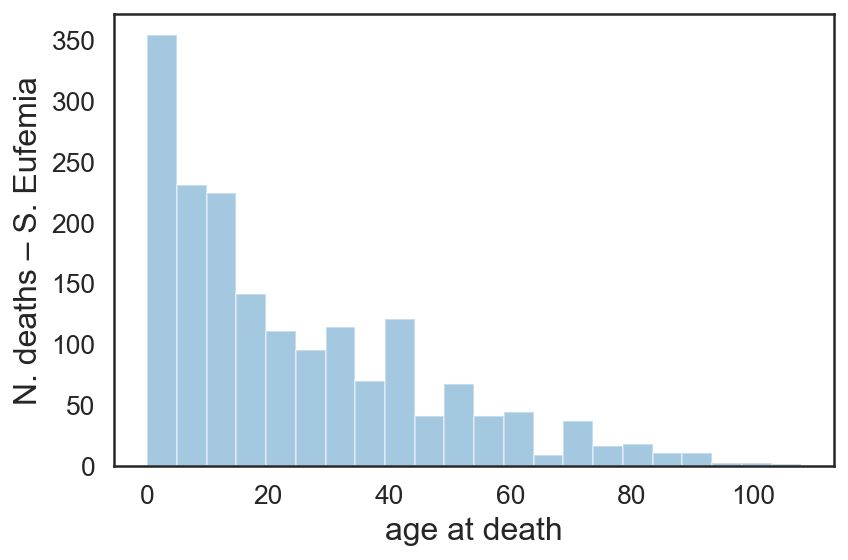

In [20]:
print('fraction of non nulls:',
      np.round(dataset.Age.notnull().sum() / dataset.shape[0], 3))

sns.distplot(dataset["Age"].dropna(), kde=False)
plt.xlabel('age at death', size=16)
plt.ylabel('N. deaths – S. Eufemia', size=16)

plt.tight_layout()

## sickness duration distribution 

dist zoomed on small(er)  sickness duration

N. datapoints above 20: 128


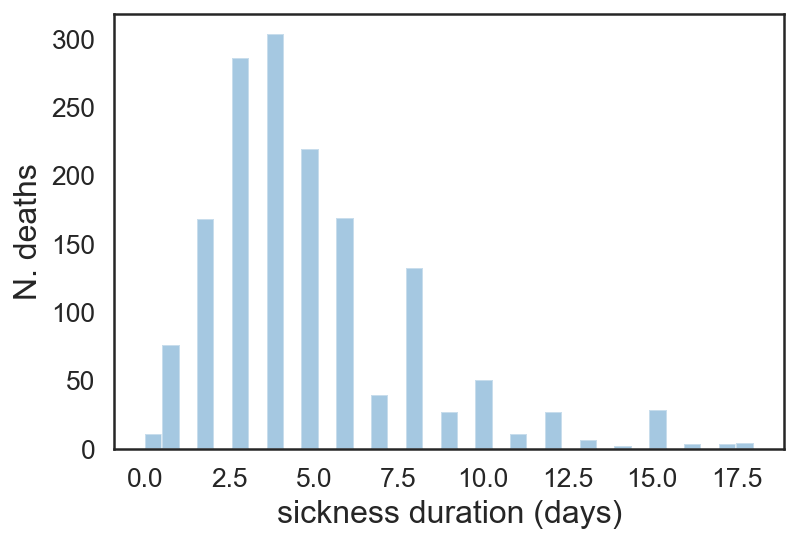

In [26]:
# set limit to zoom the dist plot
limit = 20

print(f'N. datapoints above {limit}:',
      len([x for x in dataset['sickness (days)'].dropna() if x > limit]))

sns.distplot([x for x in dataset['sickness (days)'].dropna() if x < limit],
             kde=False)

plt.xlabel('sickness duration (days)', size=16)
plt.ylabel('N. deaths', size=16)
plt.show()

dist on the whole sickness duration range

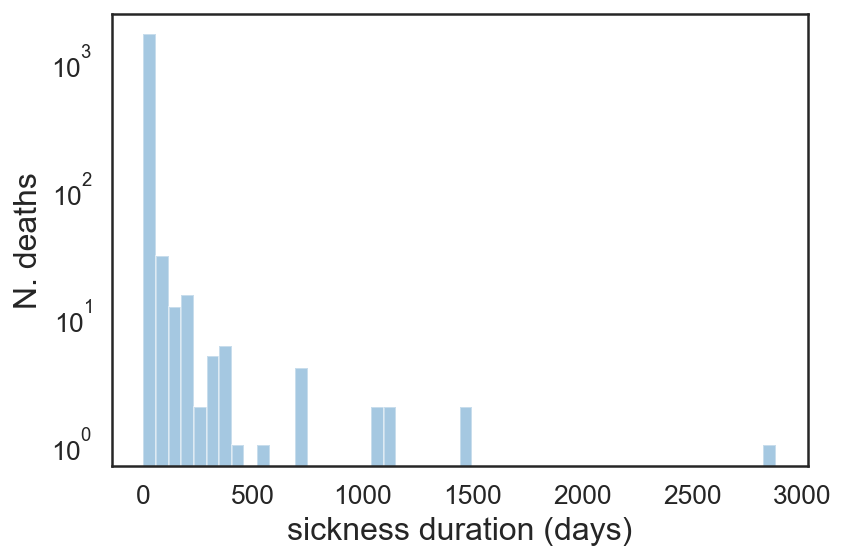

In [27]:
sns.distplot(dataset['sickness (days)'].dropna(), kde=False)
plt.yscale('log')
plt.xlabel('sickness duration (days)', size=16)
plt.ylabel('N. deaths', size=16)

plt.tight_layout()

plot large cases -- outliers?!

In [28]:
dataset.loc[dataset['sickness (days)'] > 500,:]

,Trascrizione completa,Age,Mesi,Giorni,Sex,Causa della morte,sickness (days),note,Problemi di lettura,NOTE,date
146,Domina Zuanna relicta del quondam Lodovico Bar...,80.0,NaN,NaN,F,febbre e vecchiezza,540.0,NaN,NaN,NaN,1630-09-04
180,Antonio fio del quondam Andrea Berengo de ann...,12.0,NaN,NaN,M,febbre e spasimo,1440.0,NaN,NaN,NaN,1630-10-08
202,Domina Battistina relicta del quondam Zorzi sa...,54.0,NaN,NaN,F,peste e strupiata,2880.0,Portata via dai fanti della Sanità,NaN,NaN,1630-10-16
365,Domina Francesca relicta del quondam Domenico ...,90.0,NaN,NaN,F,febbre e vecchiezza,720.0,NaN,NaN,NaN,1630-11-02
918,Domina Zanetta relicta del quondam Domenico Fe...,70.0,NaN,NaN,F,strupiata,1460.0,casa sequestrata,NaN,NaN,1630-12-29
3,La magnifica madonna Giulia Zaghis de anni 108...,108.0,NaN,NaN,F,febbre e vecchiezza,1095.0,NaN,NaN,NaN,1631-01-04
10,Sara fia de Antonio biavariol de anni 4 da feb...,4.0,NaN,NaN,F,febbre,730.0,NaN,NaN,NaN,1631-01-06
30,Messer Daniel Berengo pescador d'anni 65 da un...,65.0,NaN,NaN,M,cancro alla bocca,730.0,NaN,NaN,NaN,1631-01-15
50,La reverenda madre Samaritana Loredan professa...,60.0,NaN,NaN,F,mal di reni,730.0,NaN,NaN,NaN,1631-01-22
725,Il Chiarissimo ser Gierolamo Benedetti de anni...,90.0,NaN,NaN,M,caduta apoplettica,1095.0,NaN,NaN,NaN,1631-07-23


## gender distribution

In [29]:
dataset["Sex"].value_counts()

F       917
M       865
n.d.      1
Name: Sex, dtype: int64

# Classification of death causes

## application of classification

In [8]:
print('Tot N of causes:',dataset["Causa della morte"].nunique())

Tot N of causes: 156


distribution of N. deaths/ cause

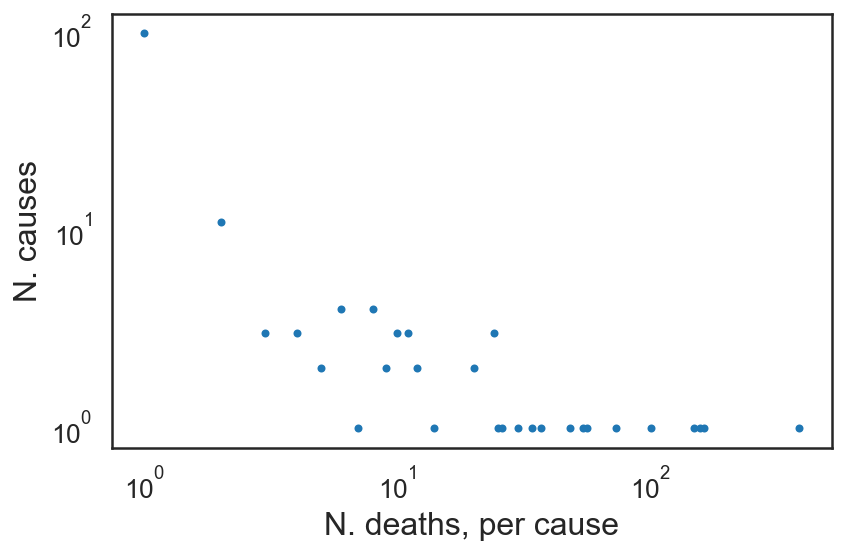

In [9]:
dataset["Causa della morte"].value_counts().value_counts().plot(marker='.',linestyle='')

plt.xlabel('N. deaths, per cause',size=16)
plt.ylabel('N. causes',size=16);
plt.yscale('log');
plt.xscale('log');

plt.tight_layout()

In [10]:
counts_by_cause =  dataset["Causa della morte"].value_counts()

threshold = 50
print(f'% of cause with deaths above {threshold}:',
      np.round(sum(counts_by_cause > threshold) / counts_by_cause.shape[0] * 100,2))
print(f'% of deaths explanied by cause > {threshold}:',
      np.round(counts_by_cause[counts_by_cause > threshold].sum()/dataset.shape[0] * 100,2))

print('\ncounts of deathts, by top cause')
print(counts_by_cause[counts_by_cause > threshold])

print('\nfraction of deathts, by top cause')
counts_by_cause[counts_by_cause > threshold] / counts_by_cause.sum()

% of cause with deaths above 50: 5.13
% of deaths explanied by cause > 50: 63.75

counts of deathts, by top cause
mal sospetto      387
febbre            163
petecchie nere    157
spasimo           148
contagio          100
mal contagioso     73
vermi              56
nascente           54
Name: Causa della morte, dtype: int64

fraction of deathts, by top cause


mal sospetto      0.217050
febbre            0.091419
petecchie nere    0.088054
spasimo           0.083006
contagio          0.056085
mal contagioso    0.040942
vermi             0.031408
nascente          0.030286
Name: Causa della morte, dtype: float64

In [11]:
{key:counts_by_cause[key] for key in counts_by_cause.keys() if 'rosse' in key}

{'petecchie rosse': 10,
 'febbre e petecchie rosse ': 2,
 'petecchie rosse e parto': 1,
 'petecchie rosse verso il nero': 1,
 'petecchie nere e rosse': 1,
 'febbre e petecchie rosse non pestilenziali': 1,
 'petecchie rosse e alcune nere': 1}

this dictionary are the same as  `plague_VS_not.csv` and `plague_VS_not_bubonic_conservative.csv`

In [12]:
causes = {'mal sospetto':True,
 'febbre':False,
 'petecchie nere':True,
 'spasimo':False,
 'contagio':True,
 'mal contagioso':True,
 'vermi':False,
 'nascente':False,
 'petecchie ':True,
 'variole':False,
 'petecchie':True,
 'peste':True,
 'parto':False,
 'febbre maligna':True,
 'carbone':True,
 'spasimo e vermi':False,
 'n.d.':False,
 'ferita':False,
 'febbre e petecchie':True,
 'febbre e mazzucco':True,
 'doglia di testa':False,
 'febbre e vecchiezza':False,
 'febbre e spasimo':False,
 'petecchie pestilenziali':True,
 'febbre e ferita':False,
 'vermi e spasimo':False,
 'catarro':False,
 'petecchie rosse':True,
 'vecchiezza':False,
 'febbre e catarro':False,
 'nosella':False,
 'febbre continua':False,
 'flusso':False,
 'mazzucco':True,
 'variole e sturioli':False,
 'febbre e vermi':False,
 'febbre e doglie di testa':False,
 'petecchie nere ':True,
 'carboni ':True,
 'petecchie e mazzucco':True,
 'apoplessia':False,
 'morto improvvisamente':False,
 'febbre etica':False,
 'petecchie e febbre maligna':True,
 'febbre e flusso':False,
 'mal mazzucco':True,
 'febbre e variole':True,
 'febbre continua ':False,
 'febbre etica e catarro':False,
 'mal di mazzucco':True,
 'febbre e ponta':False,
 'caduta':False,
 ' febbre e catarro':False,
 'febbre e petecchie rosse ':True,
 'percossia':False,
 'caduta apoplettica':False,
 'caduto da una scala':False,
 'febbre e un brusco':True,
 'febbre e petecchie nere':True,
 'senza peste esterna':False,
 'ferite da peste':True,
 'punta':False,
 'peste e petecchie nere':True,
 'spasimo e petecchie nere':True,
 'ferita ':False,
 'febbre e gotta':False,
 'petecchie rosse e alcune nere':True,
 'vermi e petecchie':True,
 'sconosciuta':False,
 'mal di pietra':False,
 'febbre e una doglia in un fianco':False,
 'disperso':False,
 'mal di reni':False,
 'brusco':True,
 'non aver latte':False,
 'doglia di testa e vermi':False,
 'per non aver avuto latte':False,
 'petecche paonazze':True,
 "ferita dietro l'orecchio":False,
 'catare nella gamba':False,
 'caduta ':False,
 'dolor di vita':False,
 'tumore':False,
 'petecchie nere e rosse':True,
 'senza sospetto':False,
 'non si sa il male':False,
 'febbre continua e altre indisposizioni':False,
 'carbonie e petecchie nere':True,
 'febbre senza sospetto':False,
 'caita nella gola':False,
 'ipoplessia e febbre':False,
 'nosella nel cuore':False,
 'febbre e una postiema':False,
 'febbre e doglia di schiena':False,
 'incinta da febbre e doglie':False,
 'nosella di mal contagioso':True,
 'petecchie rosse verso il nero':True,
 'febbre ':False,
 'petecchie et un brusco':True,
 'rogna':False,
 'febbre galica e catarro':False,
 'mal caduco e vermi':False,
 'stroppiata su la palada':False,
 'parto e spasimo':False,
 "bubbone pestilenziale all'inguine":True,
 'febbre e suspetto':True,
 'croplesion':False,
 'petecchie e spasimo':True,
 'petecchie nere contagiose':True,
 'spasimo e vecchiezza':False,
 'cancro alla bocca':False,
 'spasimo e sturioli':False,
 'spasimo e mazzucco':True,
 'febbre e doglia':False,
 'convertito etico':False,
 'annegato':False,
 'petecchie nere pestilenziali':True,
 'ipolesia':False,
 'tumore alla gola':False,
 'parto e ferita':False,
 'mal sospetto e petecchie':True,
 'mal di gotta':False,
 'mal di mare e mal sospetto':True,
 'febbre e nosella':False,
 'petecchie rosse e parto':True,
 'spasimo e infermità':False,
 'ferite  ':False,
 'partorito morto':False,
 'peste e strupiata':True,
 'doglia di testa e mazzucco':True,
 'mal di febbre':False,
 'contagio e petecchie nere':True,
 'doglia e spasimo':False,
 'parto e febbre':False,
 'ferito':False,
 'febbre e lepra(?)':False,
 'un carbon':True,
 'paralitico senza contagio':False,
 'febbre ferita e flusso':False,
 'sempre infermo':False,
 'carboni e parto':True,
 'fracassato la testa':False,
 'febbre maligna e punti':True,
 'febbre maligna e mal sospetto':True,
 'illegibile':False,
 'febbre e una scorencia':False,
 'petecchie nere e carbone':True,
 'vecchiezza e febbre':False,
 'febbre e petecchie rosse non pestilenziali':False,
 'strupiata':False,
 'infermo':False,
 'macchie nel petto giudicate pestilenziali':True,
 'patimento':False,
 'petecchie e un brusco':True,
 'mal caduco':False,
 'petecchi nere':True}

just a cross-check with the main SE dataset: these are basically the same causes

In [13]:
print(dataset['Causa della morte'].nunique() == len(causes))

print(set(dataset['Causa della morte'].unique()) - set(causes.keys()))

set(causes.keys()) - set(dataset['Causa della morte'].unique())

True
{nan}


set()

apply classification to main SE dataset

In [14]:
def is_plague(x):
    
    # this if is nedeed basically for the nan
    if x in causes.keys():
        return causes[x]
    return False


dataset["is_plague"] = dataset["Causa della morte"].apply(is_plague)

# overview: total count
dataset.is_plague.value_counts()

True     1007
False     778
Name: is_plague, dtype: int64

##  deaths time series P vs NP

In [61]:
# total deaths
gr_df = dataset.groupby(['is_plague','date']).size().reset_index(level='is_plague')

# fix col name
gr_df.rename(columns={0:'counts'},index=str,inplace=True)

# fix index 
gr_df.index = [datetime.datetime.strptime(my_idx ,'%Y-%m-%d') for my_idx in gr_df.index]

# store dataframe
gr_df.to_csv('dataset/gr_df_cases_for_plot.csv')

gr_df.head()

,is_plague,counts
1630-01-03 00:00:00,False,1
1630-01-04 00:00:00,False,2
1630-01-06 00:00:00,False,1
1630-01-08 00:00:00,False,2
1630-01-18 00:00:00,False,1


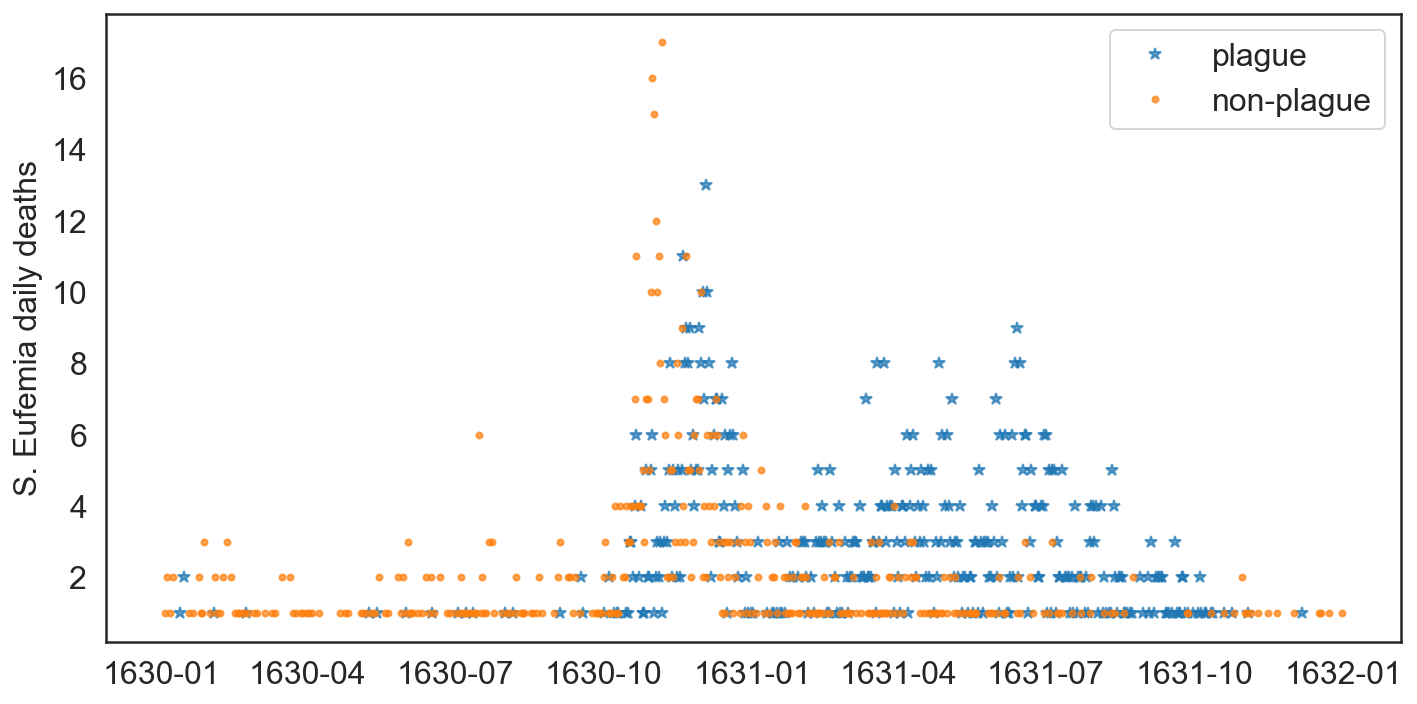

In [73]:
plt.figure(figsize=(10,5))

plt.locator_params(axis='x', tight=True)
plt.plot(gr_df.counts[gr_df.is_plague==True],label='plague',
            marker='*',linestyle='',alpha=0.7)
plt.plot(gr_df.counts[gr_df.is_plague==False],label='non-plague',
            marker='.',linestyle='',alpha=0.7)
plt.legend()

plt.ylabel('S. Eufemia daily deaths',size=16)
plt.legend(prop={'size': 16});

# plt.xticks(rotation=20);
plt.xticks(size=16);
plt.yticks(size=16);

plt.tight_layout()
plt.savefig('explorative_plots/time_series_plague_VS_non_plague_Eufemia.pdf')

##  deaths distribution  P vs NP

In [74]:
print('N. unique casues of plagues death:',dataset.loc[dataset.is_plague==True,"Causa della morte"].nunique())
print('N. unique casues of non-plagues death:',dataset.loc[dataset.is_plague==False,"Causa della morte"].nunique())

N. unique casues of plagues death: 56
N. unique casues of non-plagues death: 100


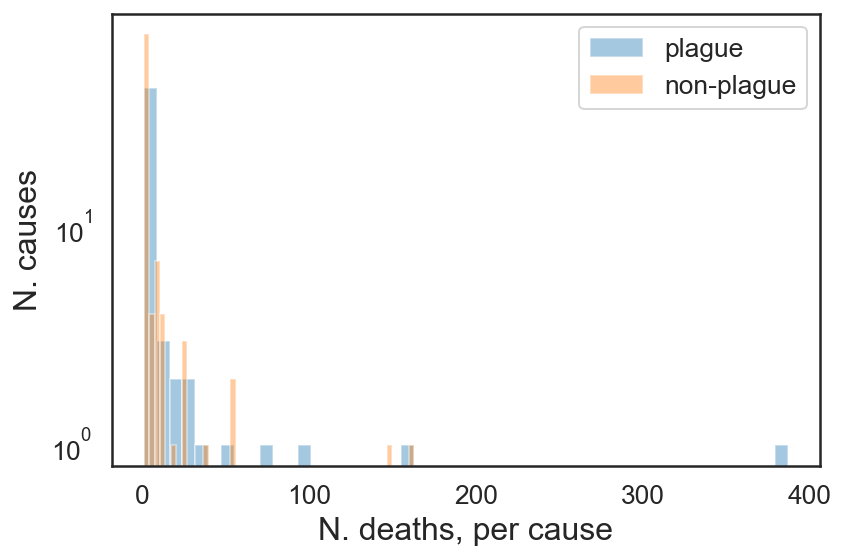

In [79]:
sns.distplot(dataset.loc[dataset.is_plague == True,
                         "Causa della morte"].value_counts(),
             label='plague',
             kde=False)

sns.distplot(dataset.loc[dataset.is_plague == False,
                         "Causa della morte"].value_counts(),
             label='non-plague',
             kde=False)

plt.xlabel('N. deaths, per cause', size=16)
plt.ylabel('N. causes', size=16)
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.savefig('explorative_plots/death_dist_by_classified_cause.pdf')

# Stats on age and sickness, by  sex and cause

define and apply age groups

In [80]:
def age_cat(x):
    if x < 3:
        return "Infant"
    elif x < 14:
        return "Child"
    elif x < 24:
        return "Young adult"
    elif x < 45:
        return "Adult"
    else:
        return "Old"
    return ""


dataset["age_category"] = dataset["Age"].apply(age_cat)

age-category distribution

In [81]:
dataset.age_category.value_counts() / dataset.shape[0]

Child          0.304202
Adult          0.236415
Old            0.181513
Young adult    0.156303
Infant         0.121569
Name: age_category, dtype: float64

## fraction of deaths, by age and sex

plague VS non-plague, __by age category__

In [82]:
dataset[dataset['is_plague']].age_category.value_counts() / dataset[dataset['is_plague']].shape[0]

Child          0.291956
Adult          0.291956
Young adult    0.209533
Old            0.172790
Infant         0.033764
Name: age_category, dtype: float64

In [83]:
dataset[~dataset['is_plague']].age_category.value_counts()/dataset[~dataset['is_plague']].shape[0]

Child          0.320051
Infant         0.235219
Old            0.192802
Adult          0.164524
Young adult    0.087404
Name: age_category, dtype: float64

sex distribution

In [84]:
dataset.Sex.value_counts() / dataset.shape[0]

F       0.513725
M       0.484594
n.d.    0.000560
Name: Sex, dtype: float64

plague VS non-plague, __by sex__

In [85]:
dataset[dataset['is_plague']].Sex.value_counts() / dataset[dataset['is_plague']].shape[0]

F    0.506455
M    0.493545
Name: Sex, dtype: float64

## stats on age, by sex and cause

mind that in the gender variable there is a missing value (not plotted)

In [86]:
dataset.Sex.value_counts()

F       917
M       865
n.d.      1
Name: Sex, dtype: int64

distributions of age at death by gender and cause

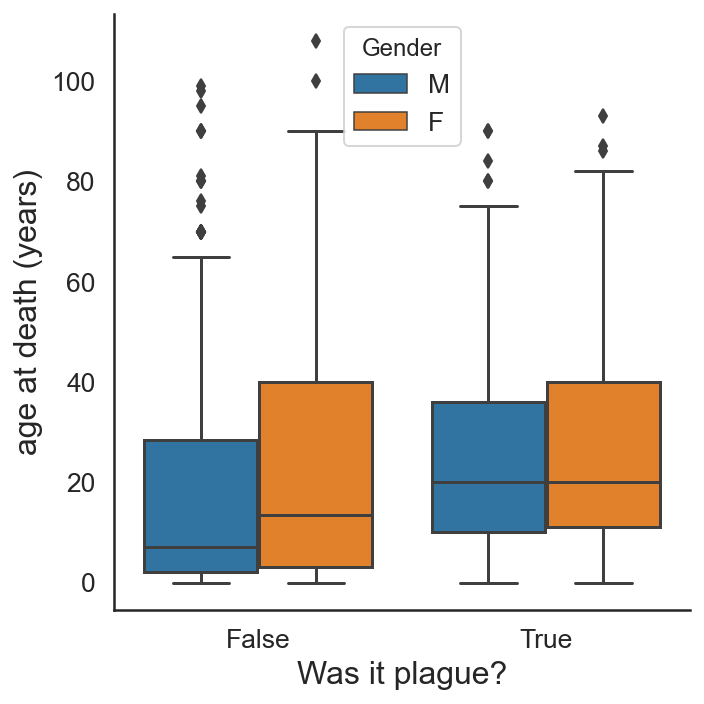

In [87]:
sns.catplot(data=dataset.loc[dataset.Sex!='n.d.',:].sort_values("Sex",ascending=False), #needed to get M then F
            kind='box',y='Age',x='is_plague',hue='Sex',legend=False)

# plt.yscale('log')
plt.ylabel('age at death (years)',size=16)

## xlabel -- in EN
# plt.xlabel('gender',size=16)
plt.xlabel('Was it plague?',size=16)

## legend title -- in EN
# plt.legend(title='Was plague?');
plt.legend(title='Gender', loc="upper center");

plt.tight_layout()
plt.savefig('explorative_plots/age_at_death_by_gender_and_cause_Eufemia.pdf')

same plot as before, but with histograms, instead of boxplots, in order to visualize the whole distributions

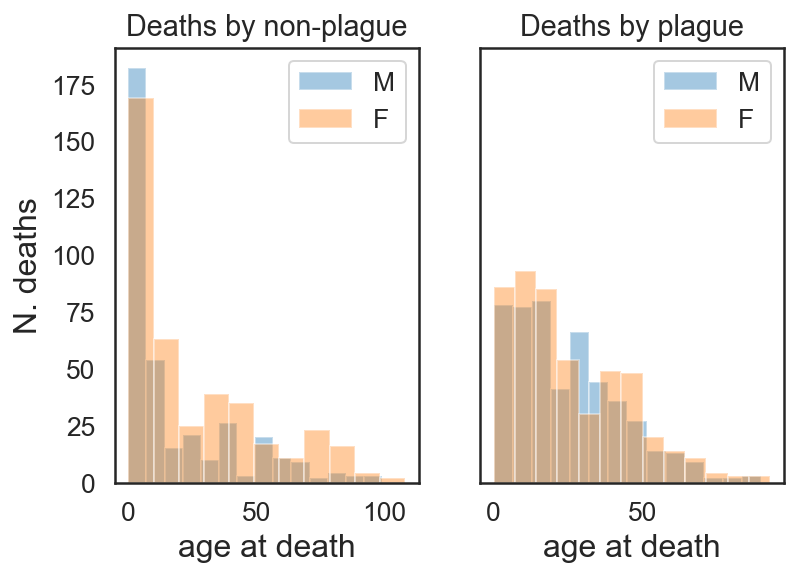

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


for sex in ['M','F']:
    
    sns.distplot(dataset.Age[(dataset.Sex==sex) & (dataset.is_plague==False)].dropna(),
                 kde=False,label=sex,ax=ax1)
    sns.distplot(dataset.Age[(dataset.Sex==sex) & (dataset.is_plague==True)].dropna(),
                 kde=False,label=sex,ax=ax2)
    
ax1.legend() 
ax1.set_title('Deaths by non-plague')
ax1.set_xlabel('age at death',size=16)
ax1.set_ylabel('N. deaths',size=16)

ax2.set_title('Deaths by plague')
ax2.legend()
ax2.set_xlabel('age at death',size=16);

In [89]:
from scipy.stats import ks_2samp

* test significance for age difference in _non-plague_ cases, due to __gender__

In [90]:
ks_2samp(dataset.Age[(dataset.Sex == 'F') & (dataset.is_plague == False)],
         dataset.Age[(dataset.Sex == 'M') & (dataset.is_plague == False)])

KstestResult(statistic=0.1321506783463305, pvalue=0.0020576515298013076)

in this case _p < 0.05_ , so we  _could reject_ the null-hypothesis --> they _could be_ significantly different...

but it's not very low...so, we would better __not claim__ a significant difference

* test significance for age difference in _plague_ cases, due to __gender__

In [91]:
ks_2samp(dataset.Age[(dataset.Sex == 'F') & (dataset.is_plague == True)],
         dataset.Age[(dataset.Sex == 'M') & (dataset.is_plague == True)])

KstestResult(statistic=0.06102497336962954, pvalue=0.2889585769381713)

in this case _p > 0.05_ , so we _cannot reject_ the null-hypothesis --> they are _not_ significantly different

* test significance for age difference due to __death causes__ ( _aggregated_ over gender )

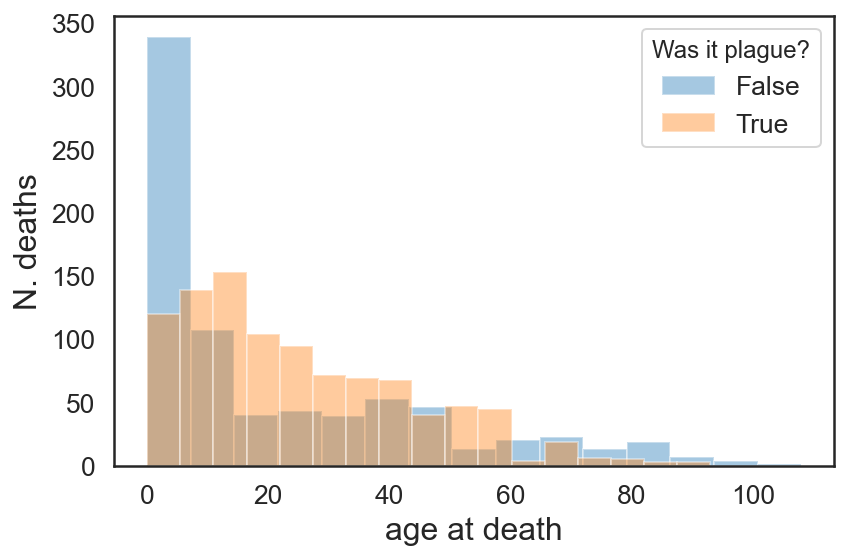

In [92]:
for my_cause in dataset.is_plague.unique():

    sns.distplot(dataset.Age[dataset.is_plague == my_cause].dropna(),
                 kde=False,
                 label=my_cause)

plt.legend(title='Was it plague?')
plt.xlabel('age at death', size=16)
plt.ylabel('N. deaths', size=16)

plt.tight_layout()
plt.savefig('explorative_plots/overall_age_dist_Eufemia_by_cause.pdf')

In [93]:
ks_2samp(dataset.Age[dataset.is_plague==True],dataset.Age[dataset.is_plague==False])

KstestResult(statistic=0.2620729444020392, pvalue=2.220446049250313e-16)

...here the difference seems statistically significant, with:

In [94]:
print('median age, for plague:',dataset.Age[dataset.is_plague==True].median())
print('median age, for non-plague:',dataset.Age[dataset.is_plague==False].median())

median age, for plague: 20.0
median age, for non-plague: 10.0


## stats on sickness duration, by sex and cause

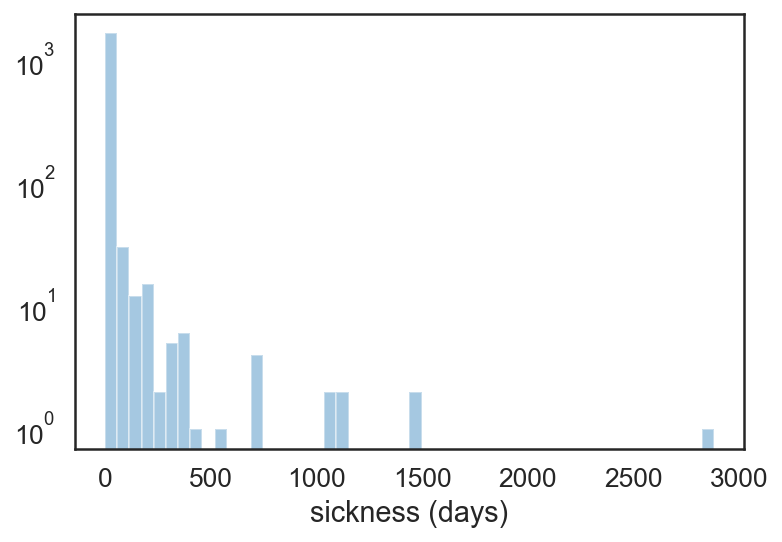

In [96]:
sns.distplot(dataset['sickness (days)'].dropna(), kde=False)
plt.yscale('log')

mind that the distribution is very skewed, with 90% or deaths having a sickness duration < 40 days

In [97]:
sum(dataset['sickness (days)'] < 40) / dataset.shape[0]

0.9047619047619048

distribution plot, by gender and cause

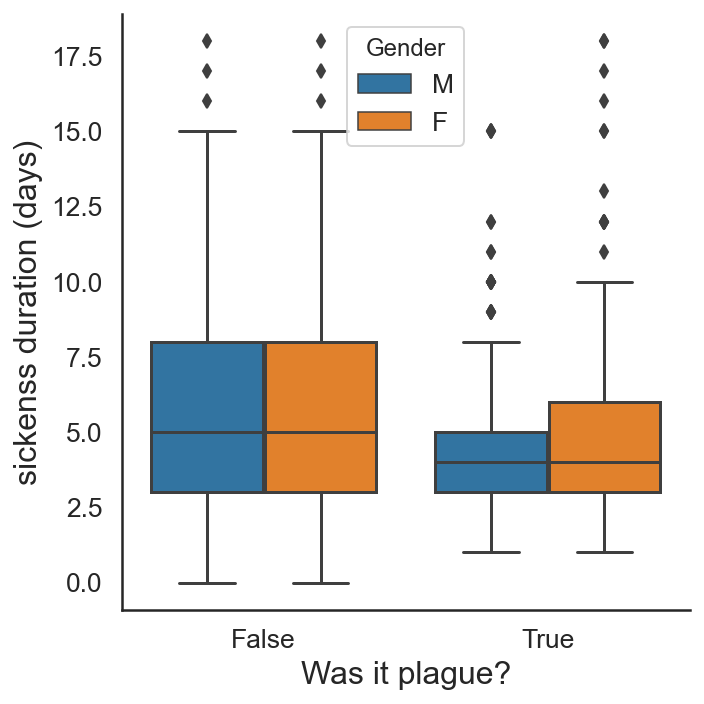

In [100]:
limit = 20
sns.catplot(data=dataset.loc[dataset['sickness (days)'] < limit,:],
            kind='box',y='sickness (days)',x='is_plague',hue='Sex',legend=False)

plt.ylabel('sickenss duration (days)',size=16)

## xlabel 
# plt.xlabel('gender',size=16) # in case you wanna swap 'hue' and 'x'
plt.xlabel('Was it plague?',size=16)

## legend title 
# plt.legend(title='Was plague?'); # in case you wanna swap 'hue' and 'x'
plt.legend(title='Gender',loc="upper center");

plt.tight_layout()
plt.savefig('explorative_plots/sickness_duration_by_gender_and_cause_Eufemia.pdf')

* test significance for sickness duration difference in _plague_ cases, due to __gender__

In [104]:
ks_2samp(dataset.loc[(dataset.Sex == 'F') & (dataset.is_plague == True), 'sickness (days)'],
         dataset.loc[(dataset.Sex == 'M') & (dataset.is_plague == True), 'sickness (days)'])

KstestResult(statistic=0.03799266185347378, pvalue=0.8407981248742613)

in this case _p > 0.05_ , so we _cannot reject_ the null-hypothesis --> they are _not_ significantly different

* test significance for sickness duration difference in _non-plague_ cases, due to __gender__

In [105]:
ks_2samp(dataset.loc[(dataset.Sex=='F') & (dataset.is_plague==False),
                     'sickness (days)'],
         dataset.loc[(dataset.Sex=='M') & (dataset.is_plague==False),
                    'sickness (days)'])

KstestResult(statistic=0.038083538083538086, pvalue=0.9278040148366925)

in this case _p > 0.05_ ,  so we _cannot reject_ the null-hypothesis --> they are _not_ significantly different

# Age and sickness across time

## time series 

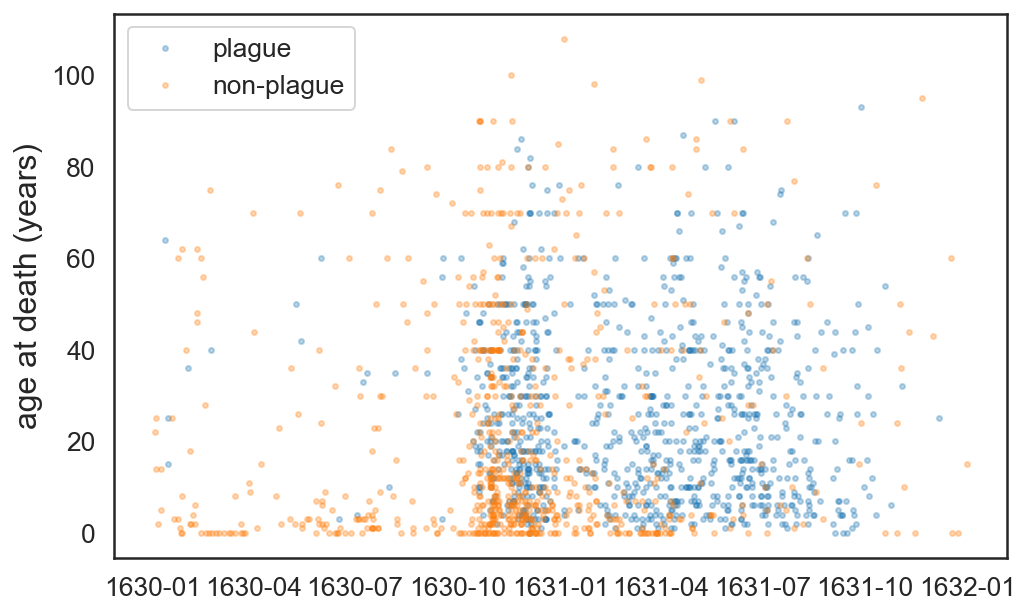

In [22]:
plt.figure(figsize=(8, 5))

p_fil = dataset.is_plague == True
np_fil = dataset.is_plague == False

plt.plot(dataset[p_fil].date, dataset[p_fil].Age,
         marker='.', linestyle='', label='plague',
         ms=5, alpha=0.3)

plt.plot(dataset[np_fil].date, dataset[np_fil].Age,
         marker='.', linestyle='', label='non-plague',
         ms=5, alpha=0.3)
plt.legend()
plt.ylabel('age at death (years)', size=16);
# plt.savefig('explorative_plots/age_by_cause_timeseries.pdf')

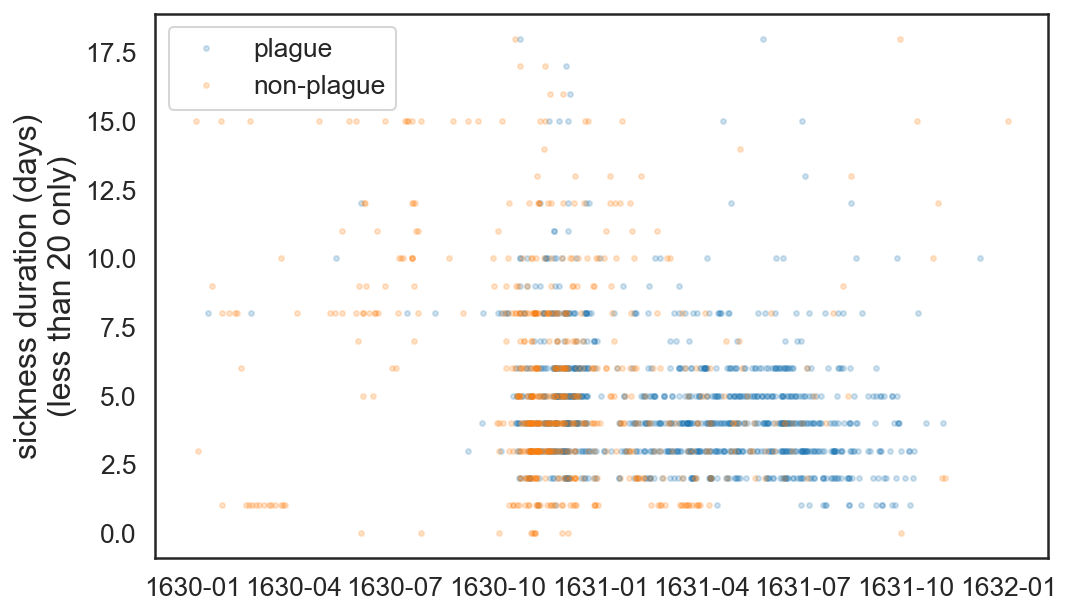

In [23]:
threshold = 20

plt.figure(figsize=(8, 5))

p_fil = (dataset.is_plague == True) & (dataset['sickness (days)'] < threshold)
np_fil = (dataset.is_plague== False) & (dataset['sickness (days)'] < threshold)

plt.plot(dataset[p_fil].date,
         dataset.loc[p_fil, 'sickness (days)'],
         marker='.',
         linestyle='',
         label='plague',
         ms=5,
         alpha=0.2)
plt.plot(dataset[np_fil].date,
         dataset.loc[np_fil, 'sickness (days)'],
         marker='.',
         linestyle='',
         label='non-plague',
         ms=5,
         alpha=0.2)
plt.legend()
plt.ylabel('sickness duration (days)\n(less than {} only)'.format(threshold),
           size=16);

# plt.savefig('explorative_plots/sickness_duration_by_cause_timeseries.pdf')

it's not so easy to get some useful info from these plots... so we move to stats aggregated over 'stages' (defined below)

## stats across stages

add column to split epidemics in two stages, defined at Feb. 1st 1631

In [24]:
# set start of the tail
start_tail = datetime.date(1631,2,1)

dataset.loc[dataset.date < start_tail, 'stage'] = 'main_outbreak'
dataset.loc[dataset.date >= start_tail, 'stage'] = 'tail_outbreak'

# show result
dataset.stage.value_counts()

main_outbreak    1001
tail_outbreak     784
Name: stage, dtype: int64

factor plots for a quick comparison of age/sickness, across sex, cause and stage

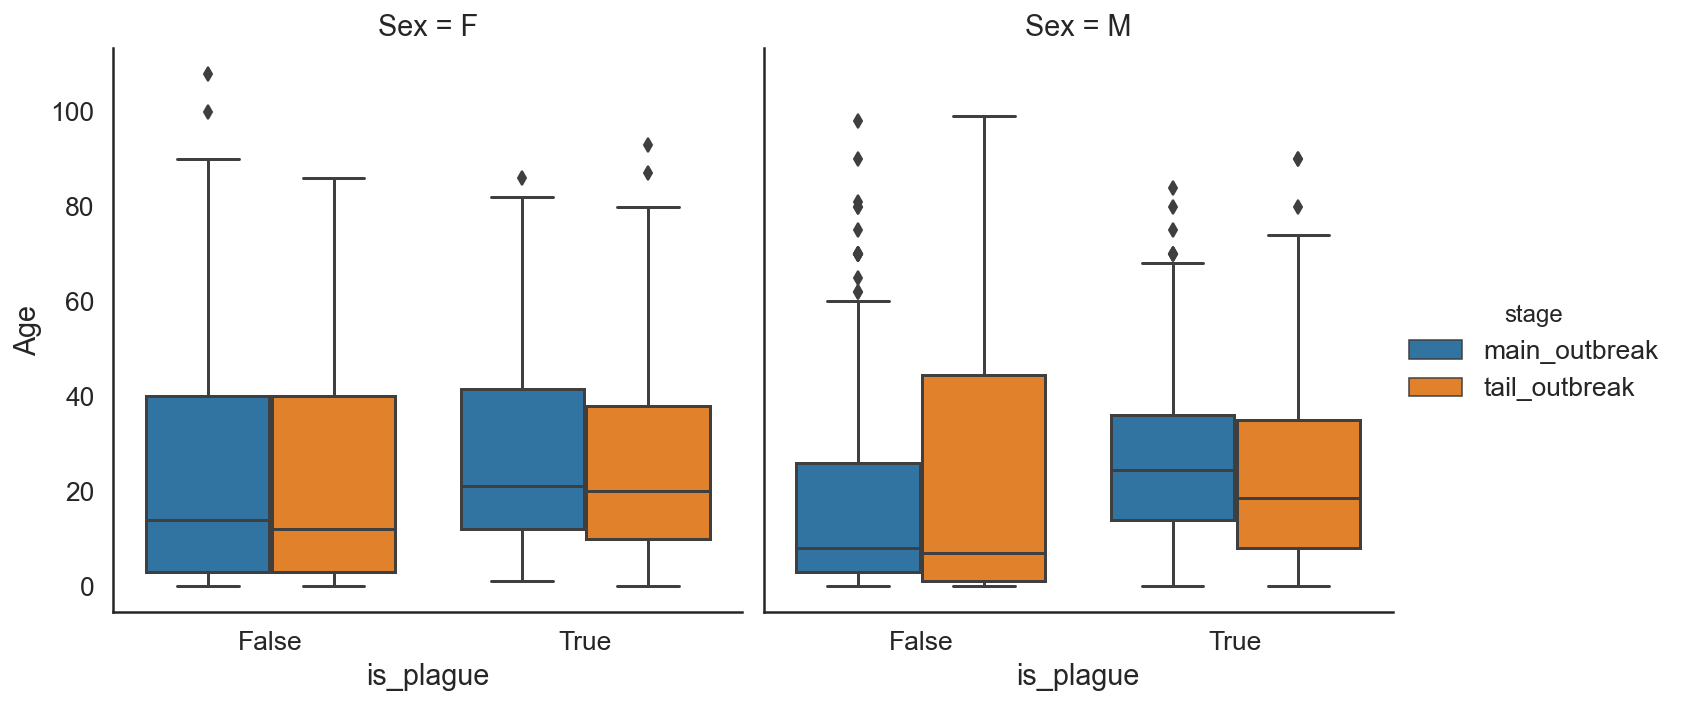

In [35]:
### version looking also at sex differences ###
sns.catplot(data=dataset[dataset.Sex != 'n.d.'],
            hue='stage',
            y='Age',
            x='is_plague',
            col='Sex',
            kind='box');
### ### ### ### ### ### ### ### ### ### ### ###

# sns.catplot(data=dataset[dataset.Sex != 'n.d.'],
#             hue='stage',y='Age',x='is_plague',
#             kind='box');

# plt.savefig('explorative_plots/age_boxplots_by_stage_and_cause_Eufemia.pdf')

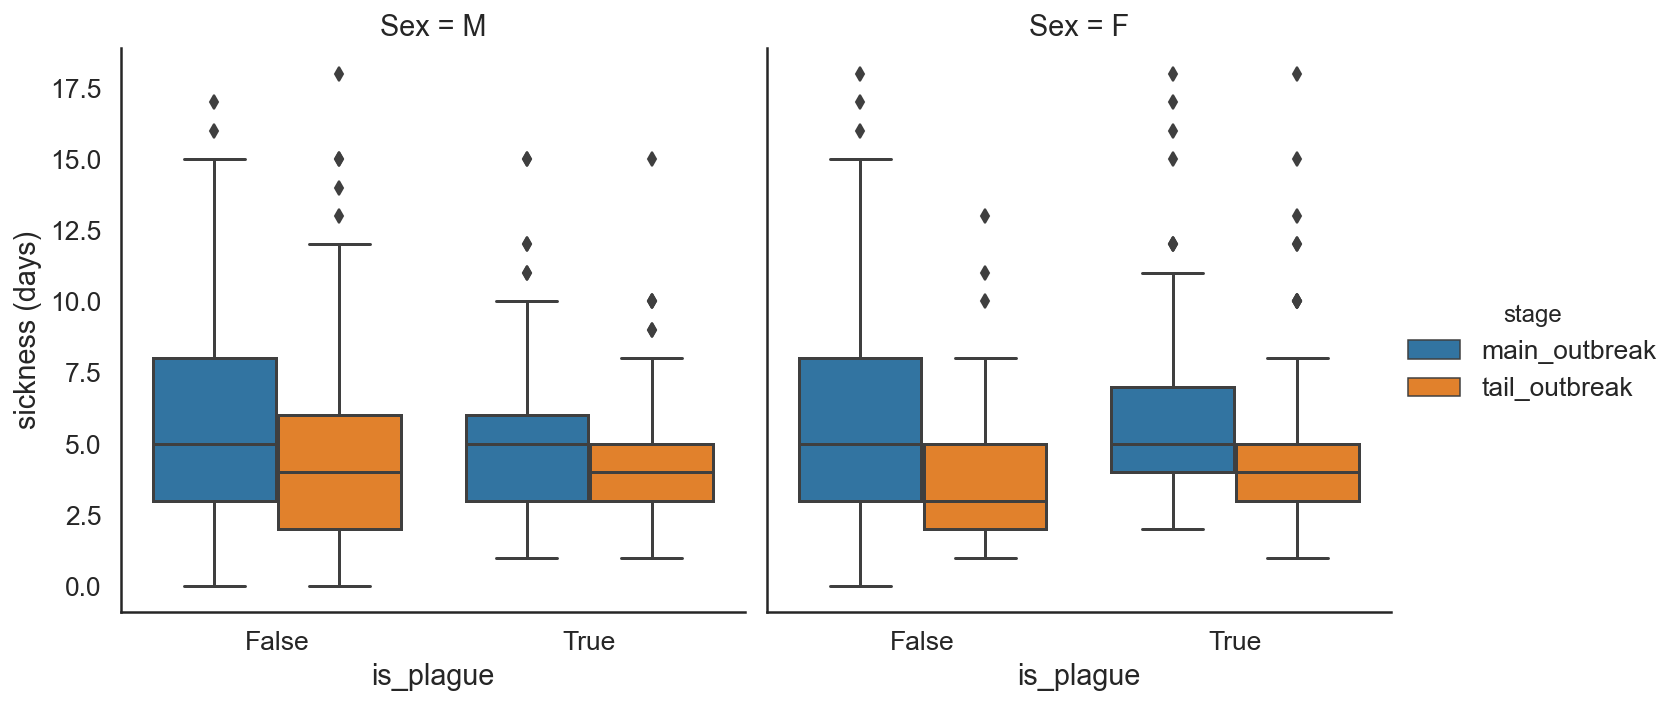

In [34]:
threshold = 20


### version looking also at sex differences ###
sns.catplot(data=dataset.loc[(dataset.Sex != 'n.d.') &
                             (dataset['sickness (days)'] < threshold),],
            hue='stage',x='is_plague',y='sickness (days)',col='Sex',
            kind='box');
### ### ### ### ### ### ### ### ### ### ### ### 

# sns.catplot(data=dataset.loc[(dataset.Sex != 'n.d.') &
#                              (dataset['sickness (days)'] < threshold),],
#             hue='stage',x='is_plague',y='sickness (days)',
#             kind='box');
# plt.ylabel('sickness duration (days)\n(plotted up to {})'.format(threshold),size=16);

# plt.savefig('explorative_plots/sickn_boxplots_by_stage_and_cause_Eufemia.pdf')

entire age/sickness distributions, by stage

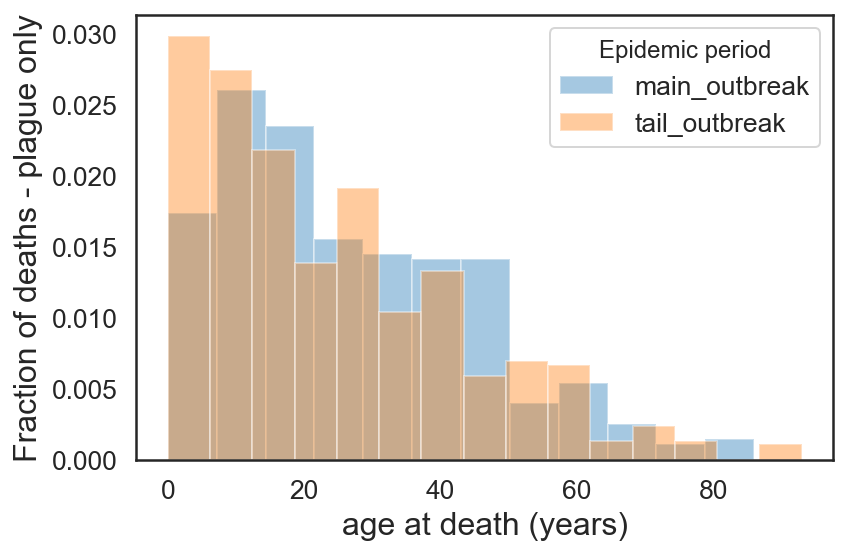

In [37]:
for my_stage in dataset.stage.unique():

    sns.distplot(dataset.Age[(dataset.stage == my_stage)
                             & (dataset.is_plague == True)].dropna(),
                 norm_hist=True,
                 kde=False,
                 label=my_stage)

plt.legend(title='Epidemic period')
plt.xlabel('age at death (years)', size=16)
plt.ylabel('Fraction of deaths - plague only', size=16)

plt.tight_layout()

# plt.savefig('explorative_plots/age_dist_by_stage_plague_only_Eufemia.pdf')

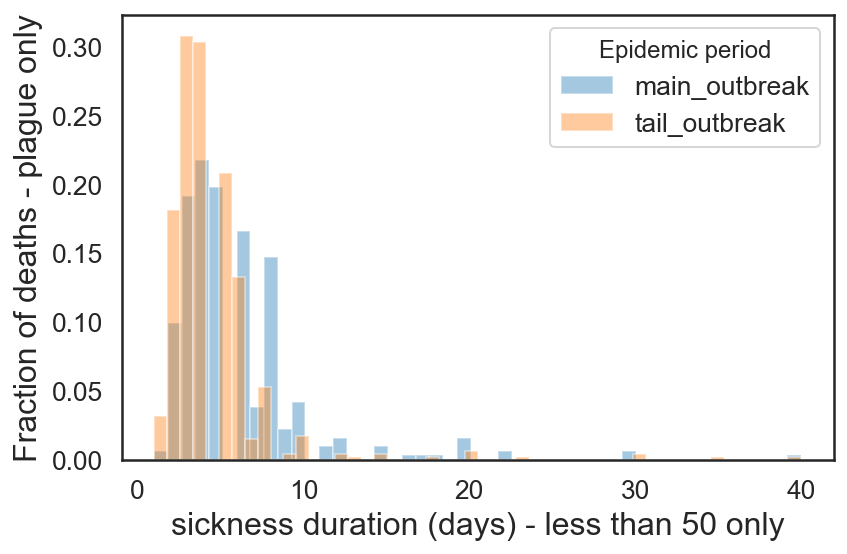

In [39]:
threshold = 50

for my_stage in dataset.stage.unique():
    
    sns.distplot(dataset.loc[(dataset.stage==my_stage) & (dataset.is_plague==True) & (dataset['sickness (days)'] < threshold),
                             'sickness (days)'].dropna(),
                 kde=False,norm_hist=True,label=my_stage)

    
plt.legend(title='Epidemic period') 

plt.xlabel('sickness duration (days) - less than {} only'.format(threshold),size=16)
plt.ylabel('Fraction of deaths - plague only',size=16)

# plt.ylabel('N. deaths\n(plotted up to {})'.format(threshold),size=16);
# plt.ylim([-5,threshold])

plt.tight_layout()

# plt.savefig('explorative_plots/sickn_dist_by_stage_plague_only_Eufemia.pdf')

In [41]:
from scipy.stats import ks_2samp

* test significance for __age at death__ difference in the two `stage` (aggregated over sex and cause)

In [42]:
ks_2samp(dataset.Age[(dataset.stage=='main_outbreak') & (dataset.is_plague==True)],
         dataset.Age[(dataset.stage=='tail_outbreak') & (dataset.is_plague==True)])

KstestResult(statistic=0.11537564745265892, pvalue=0.0031416969101905057)

in this case _p < 0.05_ , so we  _could_ reject the null-hypothesis --> they _could be_ significantly different...

* test significance for __sickness duration__ difference in the two `stage` (aggregated over sex and cause)

In [43]:
ks_2samp(dataset.loc[(dataset.stage=='main_outbreak') & (dataset.is_plague==True),'sickness (days)'],
         dataset.loc[(dataset.stage=='tail_outbreak') & (dataset.is_plague==True),'sickness (days)'])

KstestResult(statistic=0.21685708575520876, pvalue=2.56558219113856e-10)

in this case _p <<< 0.05_ , so we reject the null-hypothesis --> they are probably significantly different